<a href="https://colab.research.google.com/github/robertowilliams/TensorFlow2/blob/master/TF20_Cancer_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Cancer Classifier


**Libraries (modules)**

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [3]:
print(tf.__version__)

2.2.0


In [0]:
data = load_breast_cancer()

In [5]:
# Data type inspection
type(data)

sklearn.utils.Bunch

In [6]:
# Keys inspection
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
# data shape inspection
data.data.shape

(569, 30)

In [8]:
# data target shape inspection
data.target.shape

(569,)

In [9]:
# data target_names inspection
data.target_names.shape

(2,)

In [10]:
# Description inspection
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [11]:
# data feature_names inspection
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
# data filename inspection
data.filename

'/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/breast_cancer.csv'

In [13]:
# dta target inspection
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [14]:
# data target names inspection
data.target_names

array(['malignant', 'benign'], dtype='<U9')

**Deep Learning Data Preparation**


In [0]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)
N, D  = X_train.shape

In [0]:
# Scaling the predictors
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**TensorFlow Work**

In [0]:
# building the object

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
# building the object OPTION 2
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation = 'sigmoid'))


In [0]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [20]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100)

Epoch 1/100
12/12 [==============================] - 0s 15ms/step - loss: 0.7189 - accuracy: 0.6325 - val_loss: 0.6274 - val_accuracy: 0.6862
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6607 - accuracy: 0.6719 - val_loss: 0.5720 - val_accuracy: 0.7447
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6103 - accuracy: 0.7087 - val_loss: 0.5250 - val_accuracy: 0.7979
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5670 - accuracy: 0.7428 - val_loss: 0.4850 - val_accuracy: 0.8351
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5291 - accuracy: 0.7795 - val_loss: 0.4514 - val_accuracy: 0.8564
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4972 - accuracy: 0.8005 - val_loss: 0.4216 - val_accuracy: 0.8617
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4689 - accuracy: 0.8084 - val_loss: 0.3956 - val_accuracy: 0.8777
Epoch 8/100


In [22]:
print("Train score: ", model.evaluate(X_train, y_train))
print("Test score: ", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.1060 - accuracy: 0.9738
Train score:  [0.10603838413953781, 0.9737532734870911]
6/6 [==============================] - 0s 2ms/step - loss: 0.0714 - accuracy: 0.9840
Test score:  [0.07144772261381149, 0.9840425252914429]


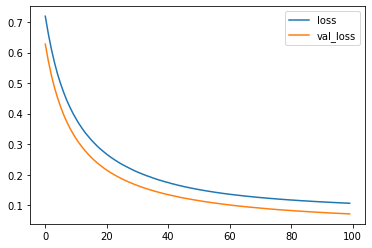

In [24]:
# Ploting the loss
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

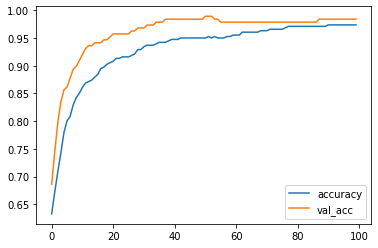

In [25]:
# Plotting the accuracy
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()